Explotary Data Analysis

Life Cycle of Machine Learning Project

1) Understand the shape of the data ( shape, info(), describe())
2) Data Cleaning ( value counts, missing data )
3) Data Exploration ( correlation,scatter points)
4) Feature Engineering, preprocessing, scaling.
5) Basic Model Building
7) Model Tuning
8) Ensemble Model Building
9) Results

1.Problem statement

    The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

    The values in the second column ("Survived") can be used to determine whether each passenger survived or not:

    if it's a "1", the passenger survived.
    if it's a "0", the passenger died.




2.   Variable	Definition	     Key

    survival	Survival	     0 = No, 1 = Yes

    pclass	    Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd 

    sex	        Sex	

    Age	        Age              in years	

    sibsp	    # of siblings / spouses aboard the Titanic

    parch	    # of parents / children aboard the Titanic	

    ticket	    Ticket number	

    fare	    Passenger fare	

    cabin	    Cabin number	

    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

3.    Variable Notes
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [ ]:
os.chdir("../")

In [3]:
%pwd

'\\\\wsl.localhost\\Ubuntu\\home\\rym\\projet\\titanic_kaggle'

In [4]:
df=pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.shape


(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [12]:
print('Categories in Survided are:', df['Survived'].unique(),'value_counts()',df['Survived'].value_counts() )
print("Categories in gender are :", df['Sex'].unique(),'value_counts()',df['Sex'].value_counts())
print("Categories in Pclass are:", df['Pclass'].unique(),'value_counts()',df['Pclass'].value_counts())
print("Categories in SibSp are", df['SibSp'].unique(),'value_counts()',df['SibSp'].value_counts())
print("Categories in Parch  are", df['Parch'].unique(),'value_counts()',df['Parch'].value_counts())
print("Categories in Ticket  are", df['Embarked'].unique(),'value_counts()',df['Embarked'].value_counts())

Categories in Survided are: [0 1] value_counts() Survived
0    549
1    342
Name: count, dtype: int64
Categories in gender are : ['male' 'female'] value_counts() Sex
male      577
female    314
Name: count, dtype: int64
Categories in Pclass are: [3 1 2] value_counts() Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Categories in SibSp are [1 0 3 4 2 5 8] value_counts() SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Categories in Parch  are [0 1 2 5 3 4 6] value_counts() Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Categories in Ticket  are ['S' 'C' 'Q' nan] value_counts() Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


Features Distribution

In [13]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Embarked Analysis & Survival Rate

C:\Users\RYM\AppData\Local\Temp\ipykernel_32392\61440259.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Embarked', data=df, order=['S', 'C', 'Q'], palette=custom_palette, ax=ax[0,1])
C:\Users\RYM\AppData\Local\Temp\ipykernel_32392\61440259.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=mean_survival, palette=custom_palette, ax=ax[1,1])


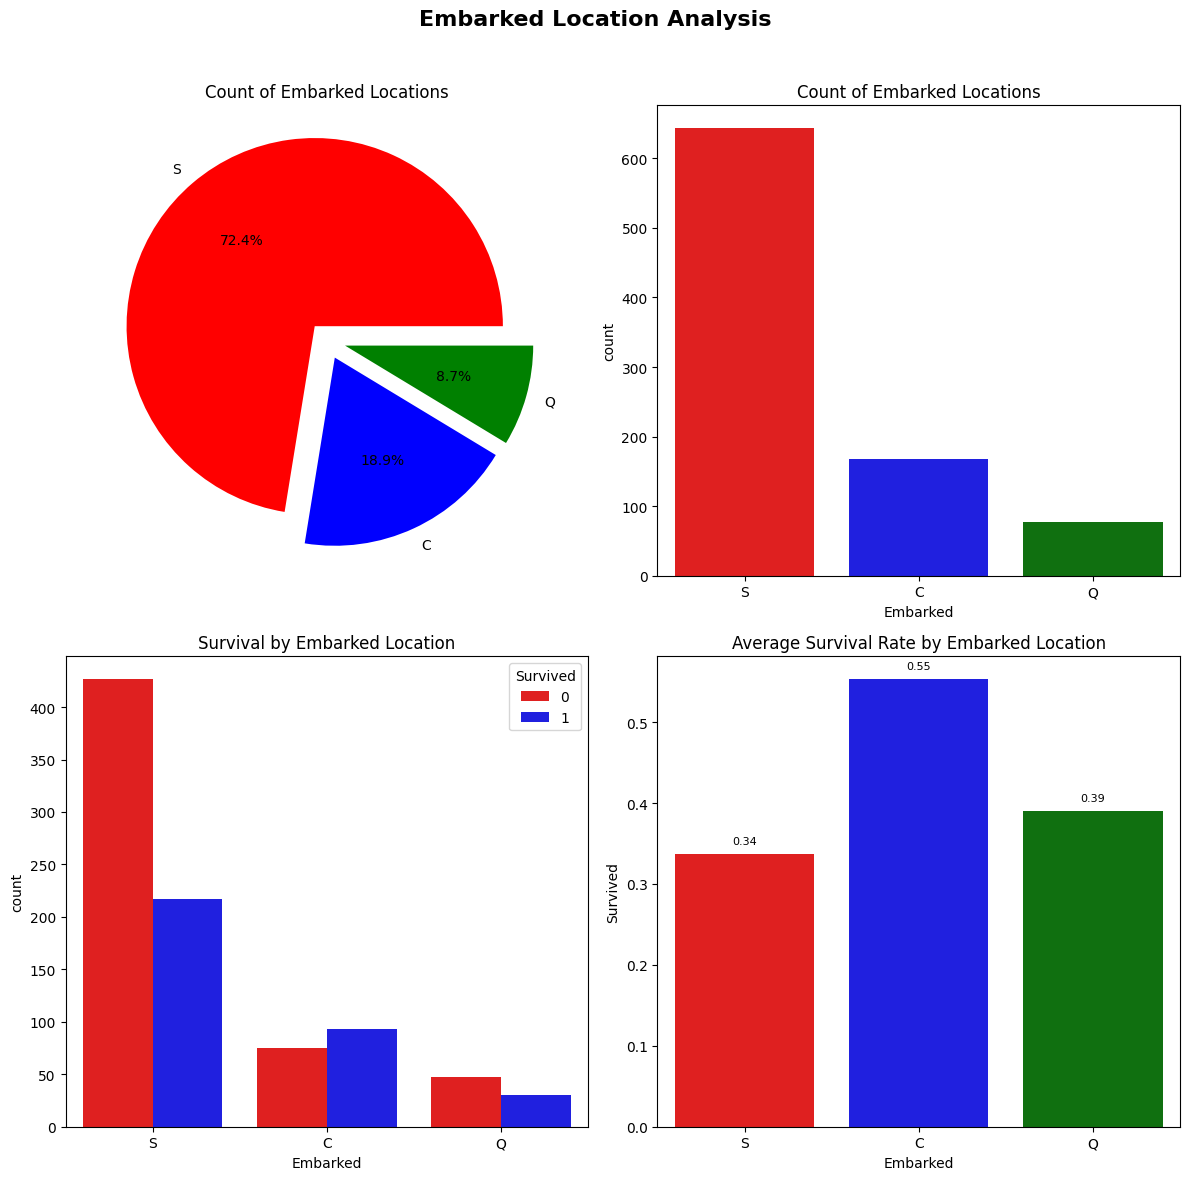

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(2, 2, figsize=(12, 12)) 


custom_palette = ['red', 'blue', 'green']

ax[0,0].pie(
    x=df['Embarked'].value_counts().loc[['S', 'C', 'Q']], 
    labels=['S', 'C', 'Q'], 
    autopct='%1.1f%%',
    explode=[0.1, 0.1, 0.1],
    colors=custom_palette
)
ax[0,0].set_title('Count of Embarked Locations')


sns.countplot(x='Embarked', data=df, order=['S', 'C', 'Q'], palette=custom_palette, ax=ax[0,1])
ax[0,1].set_title('Count of Embarked Locations')


sns.countplot(x='Embarked', hue='Survived', data=df, order=['S', 'C', 'Q'], palette=['red','blue'], ax=ax[1,0])
ax[1,0].set_title('Survival by Embarked Location')

mean_survival = df.groupby('Embarked')['Survived'].mean().reindex(['S', 'C', 'Q']).reset_index()
sns.barplot(x='Embarked', y='Survived', data=mean_survival, palette=custom_palette, ax=ax[1,1])
ax[1,1].set_title('Average Survival Rate by Embarked Location')


for i, row in mean_survival.iterrows():
    ax[1,1].text(i, row['Survived'] + 0.01, f"{row['Survived']:.2f}", 
                 color='black', ha='center', va='bottom', fontsize=8)
plt.suptitle('Embarked Location Analysis', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()



C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\699074329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cabin', data=df, palette='Set1')


Text(0.5, 1.0, 'Count of Ticket ')

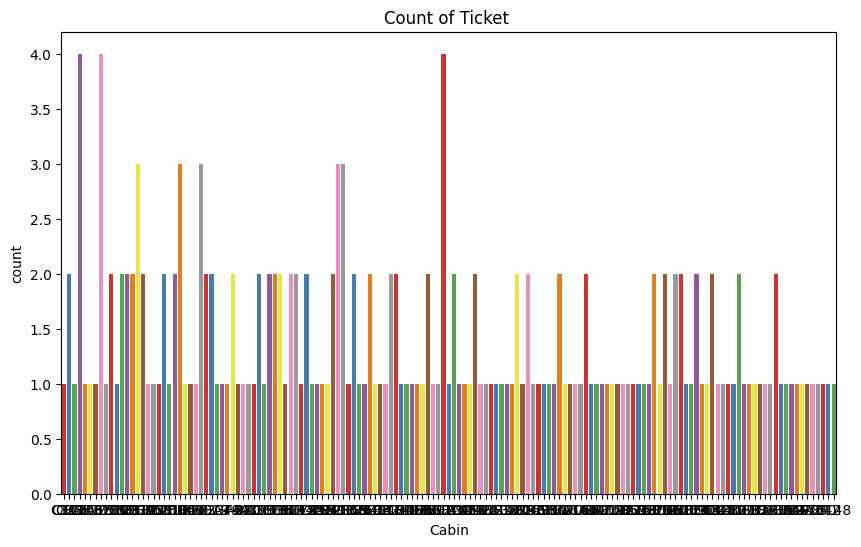

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cabin', data=df, palette='Set1')
plt.title('Count of Cabin ')

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\791439427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ticket', data=df, palette='Set1')


Text(0.5, 1.0, 'Count of Ticket ')

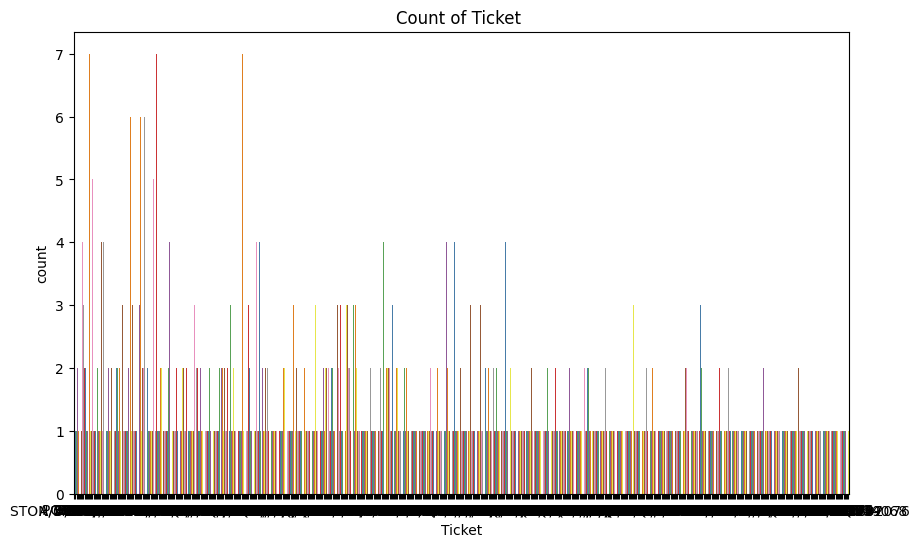

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ticket', data=df, palette='Set1')
plt.title('Count of Ticket ')

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\3817346587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fare', data=df, palette='Set1')


Text(0.5, 1.0, 'Count of Ticket ')

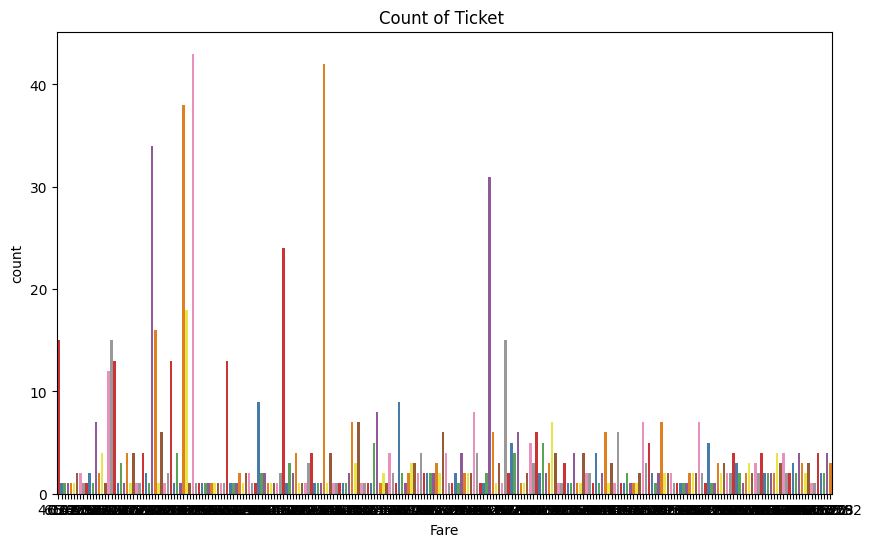

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Fare', data=df, palette='Set1')
plt.title('Count of Fare ')

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\3601503109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parch', data=df, palette='Set1')


Text(0.5, 1.0, 'Count of Parch ')

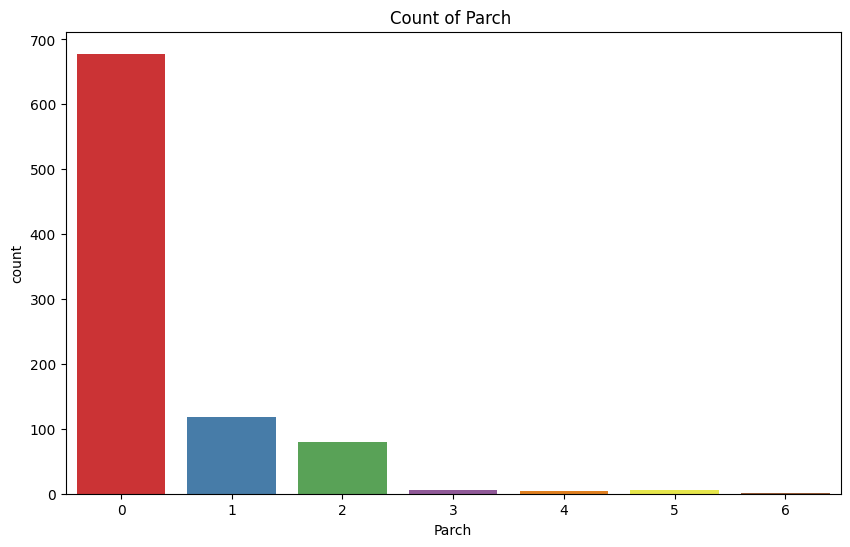

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', data=df, palette='Set1')
plt.title('Count of Parch ')

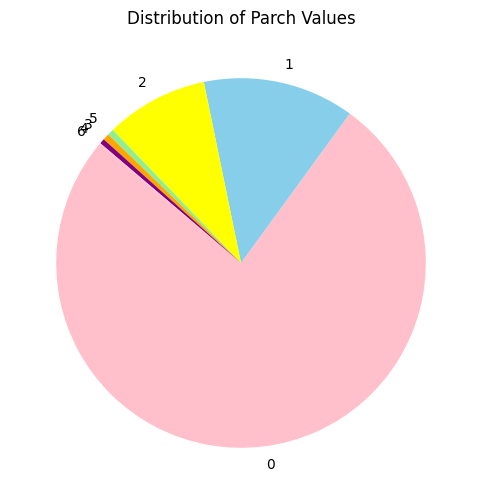

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(
    x=df['Parch'].value_counts(),
    labels=df['Parch'].value_counts().index,
    startangle=140,
    colors=['pink', 'skyblue', 'yellow', 'lightgreen', 'orange', 'purple']
)
plt.title('Distribution of Parch Values')
plt.show()

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\3524549073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp', data=df, palette='Set1')


Text(0.5, 1.0, 'Count of SibSp')

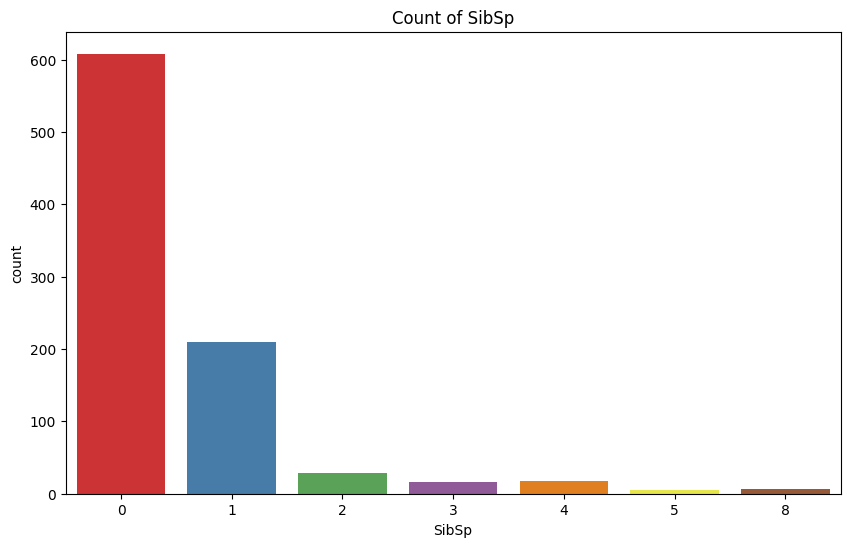

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', data=df, palette='Set1')
plt.title('Count of SibSp')

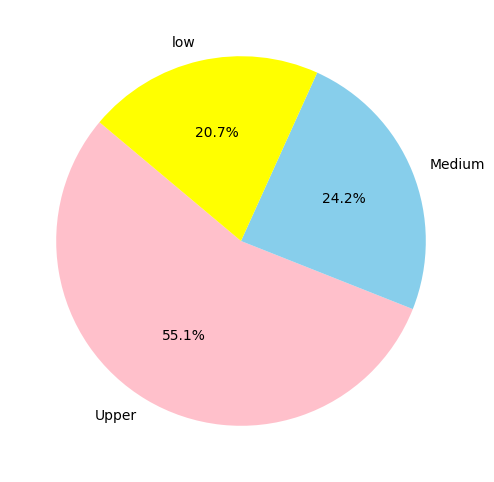

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(x=df['Pclass'].value_counts(), labels=['Upper','Medium','low'], autopct='%1.1f%%',startangle=140,colors=['pink','skyblue','yellow'])
plt.show()

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\3493955982.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Pclass',palette='Set2')


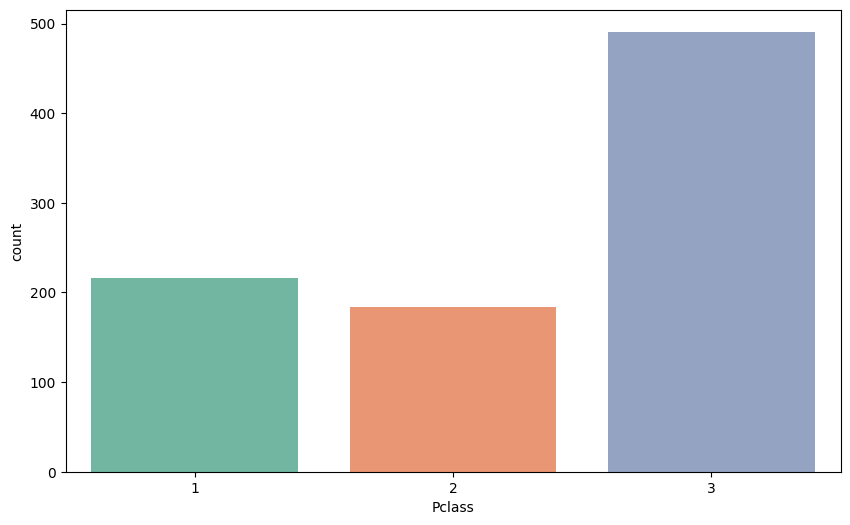

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Pclass',palette='Set2')
plt.show()

([<matplotlib.patches.Wedge at 0x2415b5a8b30>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Not Survived'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.6%'),
  Text(0.21413183525826085, -0.5604886770746836, '38.4%')])

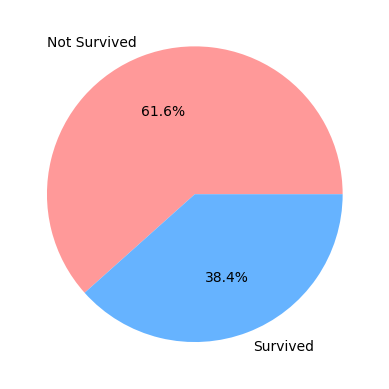

In [ ]:
plt.pie(x=df['Survived'].value_counts(), labels=['Not Survived', 'Survived'], autopct='%1.1f%%',colors=['#FF9999', '#66B3FF'])

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\2963370027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Survived', palette='Set3')


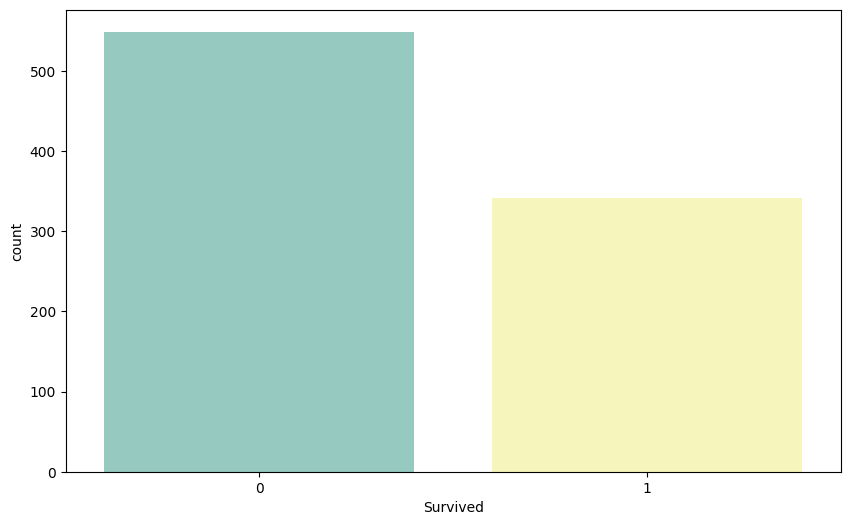

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Survived', palette='Set3')
plt.show()

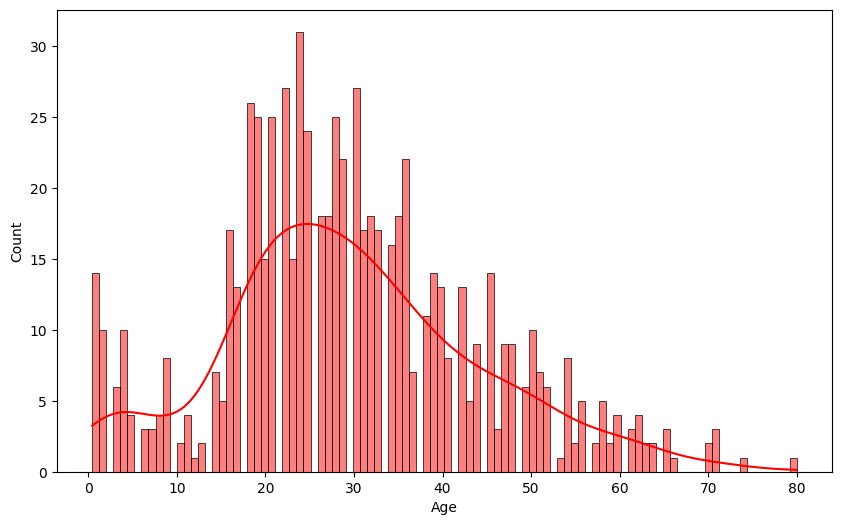

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='Age',bins=100, color='red',kde=True)
plt.show()

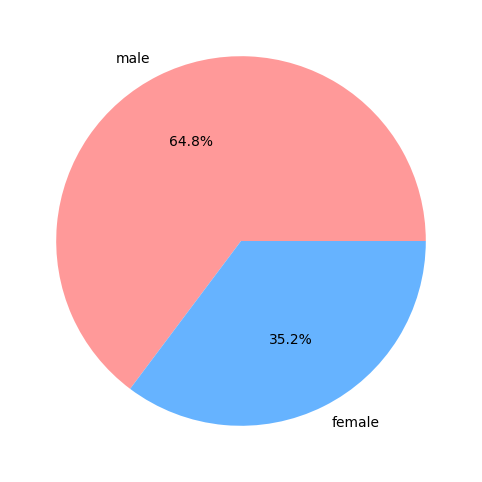

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df['Sex'].value_counts(), labels=['male', 'female'], autopct='%1.1f%%',colors=['#FF9999', '#66B3FF'])
plt.show()

C:\Users\RYM\AppData\Local\Temp\ipykernel_35540\1614175124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Sex', palette='Set1')


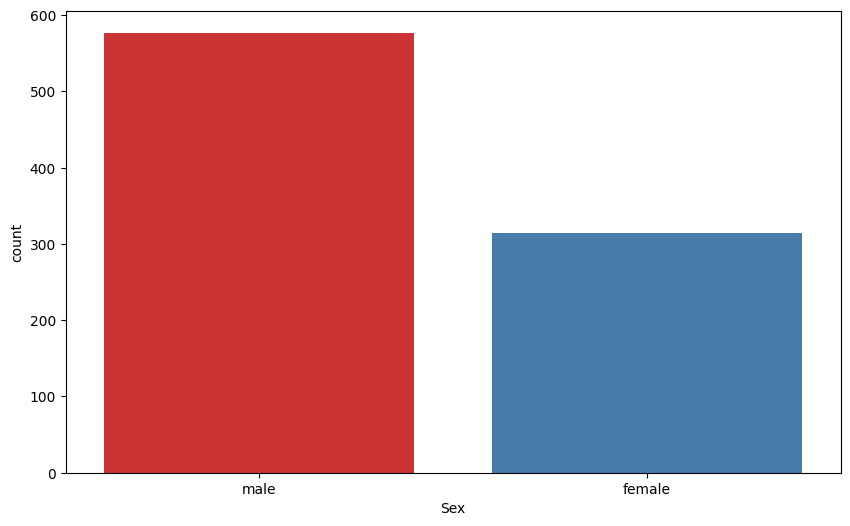

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Sex', palette='Set1')
plt.show()

Let's examine the surviavla rate of each feature

Correlation heatmpa survival to features

In [ ]:
df1=df.copy()
cat_features = df1.select_dtypes(include=['object', 'category']).columns.tolist()
labeled_cat=LabelEncoder()
for col in cat_features:
    df1[col] = labeled_cat.fit_transform(df1[col])
df1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


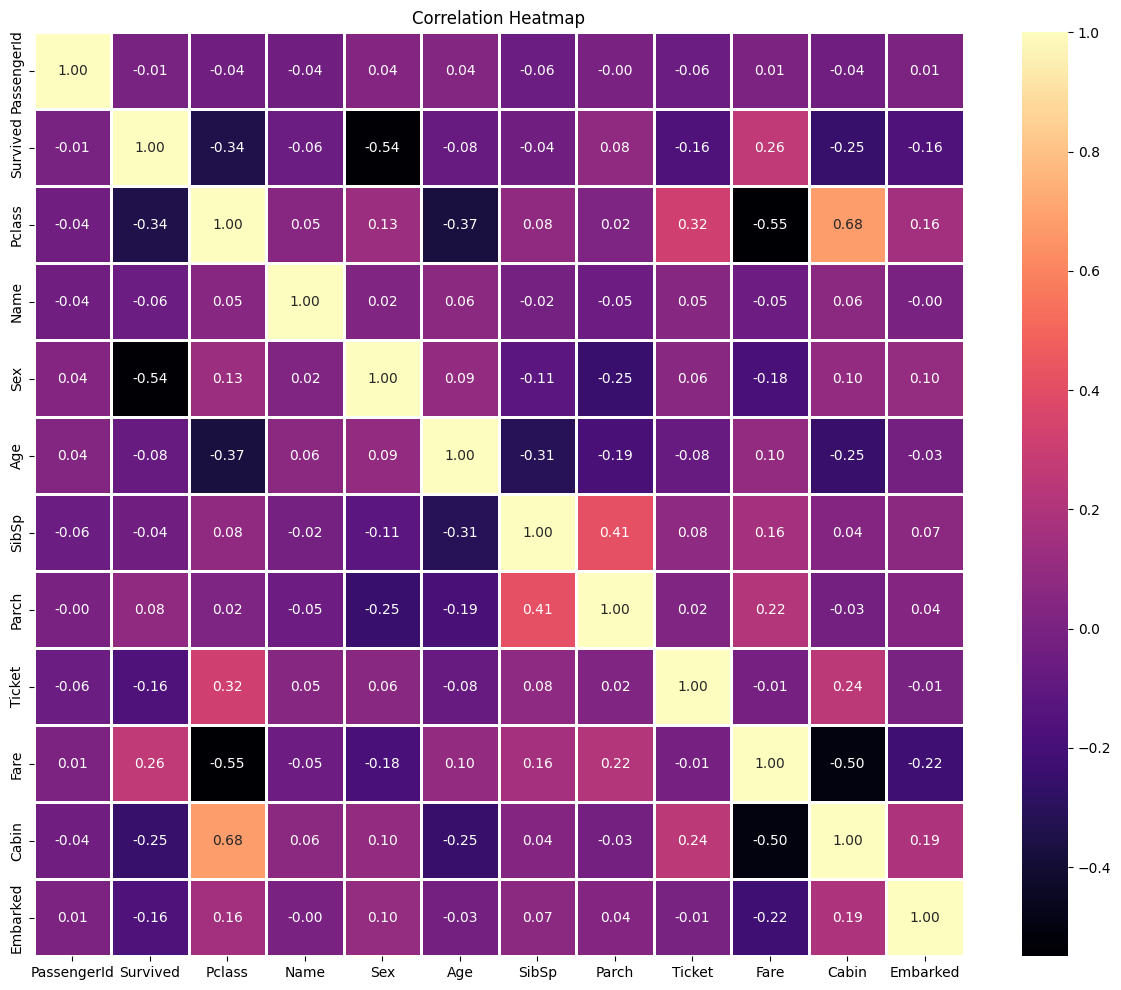

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True,cmap='magma', fmt='.2f',linewidth=2)
plt.title('Correlation Heatmap')
plt.show()

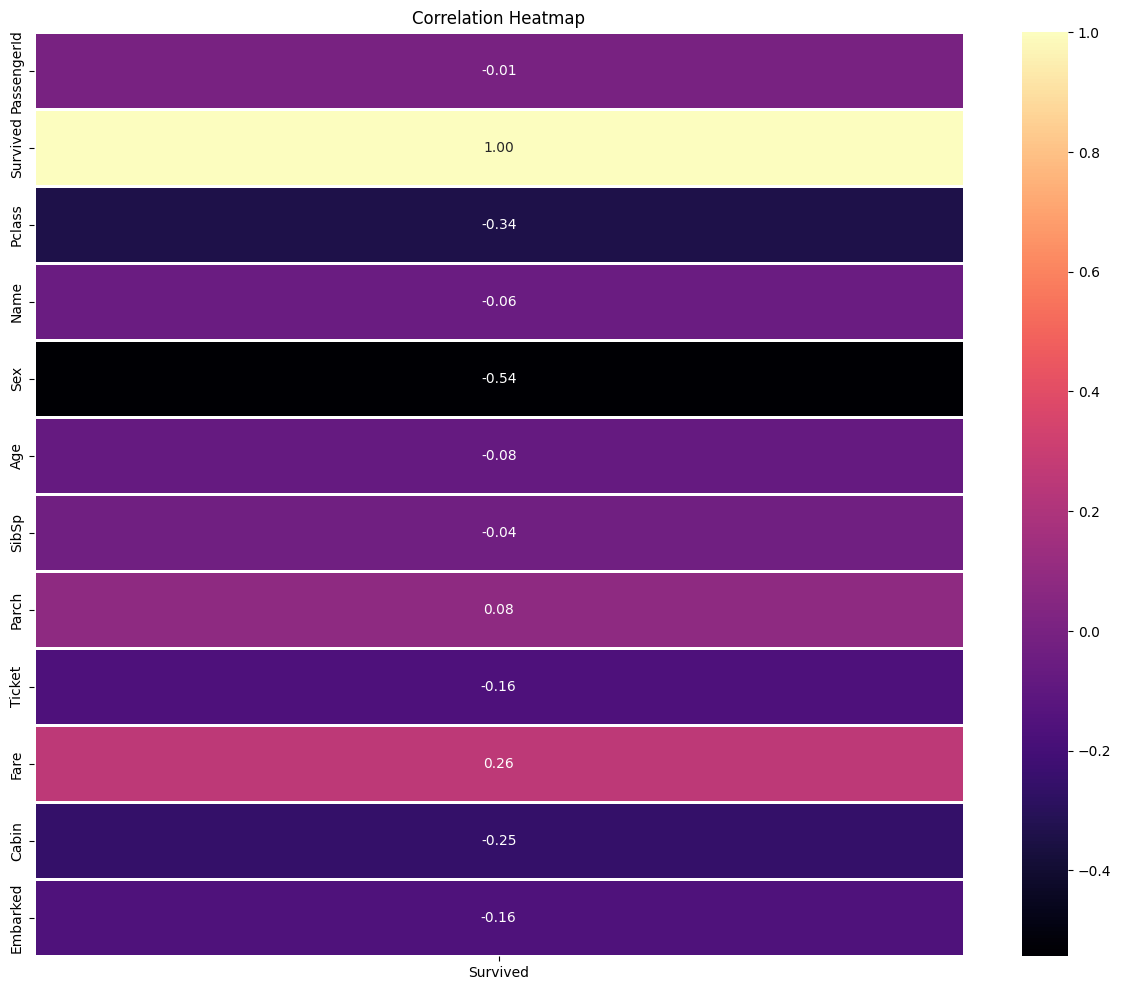

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr()[['Survived']],cmap='magma', annot=True, fmt='.2f',linewidth=2)
plt.title('Correlation Heatmap')
plt.show()